## Imports

In [1]:
import wandb
import logging
from tqdm import tqdm
from wandb.sdk.wandb_run import Run
import numpy as np
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from nn_core.common import PROJECT_ROOT
import json

/media/donato/Extra-storage/Code/model-merging/task-vector-playground-tsvmr/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
from mass.utils.plots import Palette

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "axes.titlesize": 24,        # Larger axes/title fonts
        "axes.labelsize": 24,
        "xtick.labelsize": 24,
        "ytick.labelsize": 20,
        "legend.fontsize": 24,
    }
)
sns.set_context("talk")

cmap_name = "coolwarm_r"

palette = Palette(f"{PROJECT_ROOT}/misc/palette.json", map_path=f"{PROJECT_ROOT}/misc/palette_map.json")
palette

{'blue': '#335c67',
 'white': '#fff3b0',
 'yellow': '#e09f3e',
 'red': '#9e2a2b',
 'dark red': '#540b0e',
 'green': '#81b29a'}

In [5]:
with open('plot_data/ViT-B-32.json') as f:
    results = json.load(f)

In [8]:
results = {
    "ViT-B-32": {
        '8': 1.00,
        '14': 0.995,
        '20': 0.967
    },
    "ViT-B-16": {
        '8': 0.996,
        '14': 0.988,
        '20': 0.987
    },
    "ViT-L-14": {
        '8': 1,
        '14': 1,
        '20': 1
    }
}

## Plot

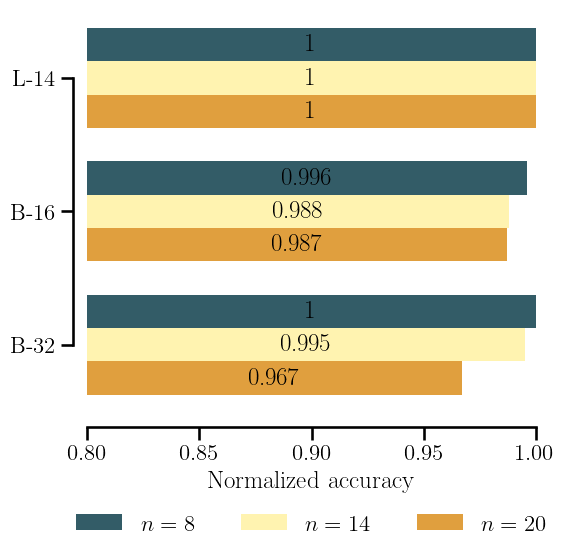

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Provided results dictionary
results = {
    "B-32": {'8': 1.00, '14': 0.995, '20': 0.967},
    "B-16": {'8': 0.996, '14': 0.988, '20': 0.987},
    "L-14": {'8': 1, '14': 1, '20': 1}
}
bar_height = 0.25

models = list(results.keys())                       # e.g., ['ViT-B-32', 'ViT-B-16', 'ViT-L-14']
tasks = list(next(iter(results.values())).keys())    # e.g., ['8', '14', '20']

results_by_task_number = {
    task: [results[model][task] for model in models]
    for task in tasks
}

y = np.arange(3)  # the label locations

fig, ax = plt.subplots(figsize=(6, 6))

# Use vertical offsets to separate the three bars per group
rects1 = ax.barh(y + bar_height, results_by_task_number['8'], bar_height,
                 label='$n=8$', color=palette["blue"])
rects2 = ax.barh(y, results_by_task_number['14'], bar_height,
                 label='$n=14$', color=palette["white"])
rects3 = ax.barh(y - bar_height, results_by_task_number['20'], bar_height,
                 label='$n=20$', color=palette["yellow"])

ax.set_xlabel('Normalized accuracy')
ax.set_yticks(y)
ax.set_yticklabels(models)
ax.legend()

ax.bar_label(rects1, label_type='center')
ax.bar_label(rects2, label_type='center')
ax.bar_label(rects3, label_type='center')

# move legend underneath

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

ax.set_xticks([0.8, 0.85, 0.9, 0.95, 1.0])
ax.set_xlim(0.8, 1.0)

sns.despine(ax=ax, offset=10, trim=True)
plt.tight_layout()
plt.savefig("figures/batched_performance.pdf", bbox_inches='tight')
plt.show()
